# 🤖 Predicción del transporte electrotronico

### *Proyecto de Machine Learning

---

## 👩‍🏫 Maestra: Lorena
## 📚 Materia: Machine Learning
## 👤 Alumno: Gerardo Valdez Martinez
## 🗓️ Fecha: 19 Noviembre del 2025



---



## Descripción del modelo de regresión multisalida

Se desarrolla un **modelo de regresión multisalida** con el objetivo de predecir múltiples parámetros simultáneamente.

El modelo cuenta con **cinco variables de entrada**, que corresponden a:  
1. El **ancho de la primera barrera**,  
2. La **distancia entre las dos barreras**,  
3. El **ancho de la segunda barrera**,  
4. La **altura de la primera barrera**, y  
5. La **altura de la segunda barrera**.  

Como **salida**, el sistema genera **25 coeficientes**, los cuales representan magnitudes de interés dentro del fenómeno estudiado.

Se trata de un **problema de alta complejidad**, debido tanto al número de variables de salida como a la necesidad de mantener una alta precisión en cada una de ellas, dado que los 25 coeficientes son fundamentales para la caracterización y predicción del comportamiento físico del sistema.


## Paso 1: Montar Google Drive y localizar los archivos de datos

En este primer paso se realiza la **conexión entre Google Colab y Google Drive** para poder acceder a los archivos almacenados en la nube.  
Esto permite trabajar directamente con los datos sin necesidad de cargarlos manualmente cada vez.

1. **Montar Google Drive**  
   Se utiliza el comando:
   ```python
   from google.colab import drive
   drive.mount('/content/drive')


In [ ]:
# ==========================================================================================
# 1) Montar Google Drive
# ==========================================================================================
# Importamos la herramienta para montar Google Drive dentro de Google Colab.
# Esto permite acceder a todos los archivos del Drive como si fueran parte del sistema local.
from google.colab import drive

# Montamos el Drive en la ruta /content/drive.
# La primera vez pedirá autorización.
drive.mount('/content/drive')


# ==========================================================================================
# 2) Importaciones del sistema de archivos
# ==========================================================================================
# os   → trabajar con rutas, revisar si un archivo existe, obtener fecha de modificación, etc.
# glob → permite buscar archivos con patrones (incluso en subcarpetas).
import os, glob


# ==========================================================================================
# 3) Nombres EXACTOS de los archivos a buscar
# ==========================================================================================
# Es importante que coincidan exactamente con el nombre real en Drive.
x_filename = "db1_dp_db2_Vb1_Vb2 (3).txt"
y_filename = "OUT_COEFI_INTERPOLATION (2).txt"


# ==========================================================================================
# 4) Definir raíz de búsqueda (todo el Google Drive)
# ==========================================================================================
# Usamos todo /content/drive porque ahí se monta MyDrive y todos los archivos compartidos.
search_root = "/content/drive"

# Hacemos una búsqueda recursiva:
# "**" → significa buscar dentro de todas las carpetas y subcarpetas.
# recursive=True → activa la búsqueda profunda.
x_candidates = [p for p in glob.glob(os.path.join(search_root, "**", x_filename), recursive=True)]
y_candidates = [p for p in glob.glob(os.path.join(search_root, "**", y_filename), recursive=True)]


# ==========================================================================================
# 5) Función para elegir el mejor archivo encontrado
# ==========================================================================================
def choose_best(cands, label):
    """
    Elige el archivo correcto entre varias coincidencias:
    - Si no se encuentra ninguno → error claro para el usuario.
    - Si se encuentran varios → selecciona el más reciente por fecha de modificación.
    """

    # Si no hay coincidencias, se avisa con un error explícito.
    if not cands:
        raise FileNotFoundError(
            f"No se encontró '{label}' en tu Google Drive. "
            f"Verifica que esté compartido/propietario y el NOMBRE exacto del archivo."
        )

    # Ordenamos los archivos encontrados, del más reciente al más antiguo,
    # usando la fecha de modificación (mtime).
    cands_sorted = sorted(cands, key=lambda p: os.path.getmtime(p), reverse=True)

    # Mostramos las primeras coincidencias encontradas (hasta 5).
    print(f"[INFO] Se encontró {label}:")
    for i, p in enumerate(cands_sorted[:5], 1):
        print(f"  {i}. {p}")

    # Seleccionamos la coincidencia más reciente (posición 0 de la lista ordenada).
    print(f"[USANDO] {cands_sorted[0]}\n")
    return cands_sorted[0]


# ==========================================================================================
# 6) Elegir la mejor ruta para cada archivo (X e Y)
# ==========================================================================================
X_path = choose_best(x_candidates, x_filename)
Y_path = choose_best(y_candidates, y_filename)


# ==========================================================================================
# 7) Comprobaciones de seguridad (asegura que los archivos existen realmente)
# ==========================================================================================
# assert detiene el programa si la condición es falsa, con un mensaje claro.
assert os.path.exists(X_path), f"No existe: {X_path}"
assert os.path.exists(Y_path), f"No existe: {Y_path}"

# Imprimimos las rutas finales seleccionadas.
print("Rutas finales asignadas:")
print("X_path =", X_path)
print("Y_path =", Y_path)


# ==========================================================================================
# 8) Vista rápida y validación del contenido usando pandas
# ==========================================================================================
# pandas permite leer archivos como tablas (DataFrames).
import pandas as pd


def quick_peek(path, n=5):
    """
    Función para visualizar rápidamente los primeros renglones de un archivo.
    Si el archivo no puede leerse (delimitadores incorrectos, archivo corrupto),
    muestra un mensaje de error amigable.
    """

    try:
        # Leemos el archivo suponiendo separación por espacios.
        # r"\s+" → uno o más espacios como separador entre columnas.
        df = pd.read_csv(path, sep=r"\s+", header=None, engine="python")

        # Mostramos forma del archivo y sus primeras filas.
        print(f"\nPrevio de {os.path.basename(path)} (shape {df.shape}):")
        display(df.head(n))

    except Exception as e:
        # Si ocurre un error, se informa sin detener el programa.
        print(f"No se pudo previsualizar {os.path.basename(path)} con pandas. Error: {e}")


# Visualizamos el contenido de ambos archivos
quick_peek(X_path)
quick_peek(Y_path)


Mounted at /content/drive
[INFO] Se encontró db1_dp_db2_Vb1_Vb2 (3).txt:
  1. /content/drive/MyDrive/Colab Notebooks/bd grafeno preyecto final/db1_dp_db2_Vb1_Vb2 (3).txt
[USANDO] /content/drive/MyDrive/Colab Notebooks/bd grafeno preyecto final/db1_dp_db2_Vb1_Vb2 (3).txt

[INFO] Se encontró OUT_COEFI_INTERPOLATION (2).txt:
  1. /content/drive/MyDrive/Colab Notebooks/bd grafeno preyecto final/OUT_COEFI_INTERPOLATION (2).txt
[USANDO] /content/drive/MyDrive/Colab Notebooks/bd grafeno preyecto final/OUT_COEFI_INTERPOLATION (2).txt

Rutas finales asignadas:
X_path = /content/drive/MyDrive/Colab Notebooks/bd grafeno preyecto final/db1_dp_db2_Vb1_Vb2 (3).txt
Y_path = /content/drive/MyDrive/Colab Notebooks/bd grafeno preyecto final/OUT_COEFI_INTERPOLATION (2).txt

Previo de db1_dp_db2_Vb1_Vb2 (3).txt (shape (10000, 5)):


,0,1,2,3,4
0,57.286918,135.194802,71.245170,0.024084,0.044295
1,57.524121,80.201507,58.085322,0.057438,0.034819
2,55.254948,89.000249,69.943738,0.070829,0.048380
3,35.007632,123.789811,73.440337,0.061254,0.045735
4,40.669632,50.033903,34.567440,0.065223,0.065293



Previo de OUT_COEFI_INTERPOLATION (2).txt (shape (10000, 25)):


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,12.41112,-7.27752,0.83872,-1.38067,0.09373,-0.52660,-0.04236,0.33756,0.42795,-0.37281,...,-0.01390,0.00461,-0.07480,-0.01281,-0.04147,0.00506,-0.02616,0.00669,-0.02610,-0.00252
1,11.25609,-6.19603,0.28775,-1.29355,0.37082,0.86749,-0.45813,-0.51268,0.01576,-0.00668,...,-0.06544,-0.04122,-0.05900,-0.00878,-0.03898,-0.01847,-0.04051,-0.01289,-0.02866,-0.01101
2,9.39751,-4.52761,0.18831,-0.78202,0.10229,1.09159,-0.97117,-0.82767,0.16452,-0.14269,...,-0.12486,-0.06178,-0.00145,0.07468,-0.02065,0.00207,0.00404,0.05251,0.01033,0.01300
3,11.18991,-6.34989,0.67397,-1.32002,0.25540,-0.71769,1.02761,0.23662,-0.65241,-0.15363,...,-0.11746,-0.01590,-0.02303,-0.00542,-0.02745,-0.03400,-0.04815,-0.01796,-0.01916,-0.01171
4,11.69425,-6.36840,-0.77800,1.32723,-0.63693,-0.65803,0.37865,-0.36554,-0.08156,-0.07949,...,-0.05947,-0.01503,-0.05004,-0.01081,-0.04003,-0.00965,-0.03255,-0.00798,-0.02731,-0.00666


#Dependencias del Proyecto (Imports)

---

Este bloque importa todas las librerías esenciales para la manipulación de datos, la construcción, el entrenamiento y la evaluación de un modelo de **Red Neuronal** para clasificación/regresión.

### Librerías Fundamentales

* **`os`**: Módulo del sistema operativo para manejo de rutas de archivos.
* **`numpy` (`np`)**: Base para operaciones numéricas de alto rendimiento y manejo de *arrays*.
* **`matplotlib` (`plt`)**: Utilizado para generar visualizaciones y gráficos de los datos y el rendimiento del modelo.
    * *`AutoMinorLocator`*: Herramienta específica para mejorar la visualización de los ejes.

###  Deep Learning (TensorFlow/Keras)

* **`tensorflow` (`tf`)**: El framework principal de *Deep Learning*.
* **`Sequential`**: Clase para construir la arquitectura de la red neuronal de forma lineal.
* **Capas (`Dense`, `Dropout`, `ReLU`)**:
    * `Dense`: Capas totalmente conectadas.
    * `Dropout`: Capa de regularización para prevenir el sobreajuste.
    * `ReLU`: Función de activación rectificada.
* **`Adam`**: Uno de los optimizadores más avanzados y comunes para ajustar los pesos del modelo durante el entrenamiento.

###  Herramientas de Machine Learning (Scikit-learn)

* **`train_test_split`**: Función para dividir el dataset en conjuntos de entrenamiento y prueba de forma aleatoria.
* **`StandardScaler`**: Módulo de preprocesamiento para **normalizar** los datos (media 0 y desviación estándar 1).
* **`r2_score`**: Métrica de evaluación que calcula el Coeficiente de Determinación ($R^2$), útil para medir el desempeño en problemas de **regresión**.

In [ ]:
# Importamos el módulo 'os' para manejar rutas, archivos y funciones del sistema operativo.
import os

# NumPy se usa para trabajar con arreglos y operaciones numéricas de alto rendimiento.
import numpy as np

# Matplotlib se utiliza para generar gráficas y visualizaciones.
import matplotlib.pyplot as plt

# AutoMinorLocator permite agregar subdivisiones menores en los ejes de las gráficas.
from matplotlib.ticker import AutoMinorLocator

# Importamos TensorFlow, el framework principal para construir y entrenar redes neuronales.
import tensorflow as tf

# 'Sequential' permite crear modelos de redes neuronales capa por capa en orden lineal.
from tensorflow.keras.models import Sequential

# 'Dense' define capas totalmente conectadas, 'Dropout' previene sobreajuste, y 'ReLU' aplica la activación rectificada.
from tensorflow.keras.layers import Dense, Dropout, ReLU

# Adam es un optimizador avanzado utilizado para ajustar los pesos de la red neuronal.
from tensorflow.keras.optimizers import Adam

# Callbacks: EarlyStopping detiene el entrenamiento cuando no hay mejora
# y ReduceLROnPlateau reduce la tasa de aprendizaje cuando el modelo se estanca.
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Divide los datos en conjuntos de entrenamiento y prueba de forma aleatoria.
from sklearn.model_selection import train_test_split

# StandardScaler normaliza los datos para que tengan media 0 y desviación estándar 1.
from sklearn.preprocessing import StandardScaler

# r2_score calcula el coeficiente de determinación (R²), útil para medir el desempeño en regresión.
from sklearn.metrics import r2_score



#  1) Carga y Preparación Inicial de Datos

---

Esta sección se encarga de cargar los *datasets* de entrada (**X**) y salida (**Y**) y realiza las verificaciones y transformaciones iniciales necesarias para el procesamiento posterior.

###  Detalles de la Carga

| Variable | Código | Descripción |
| :--- | :--- | :--- |
| **X** (Entradas) | `np.loadtxt(X_path)` | Carga los datos de entrada/características. Se espera una forma de `(n, 5)`, donde $n$ es el número de muestras y 5 son las características. |
| **Y** (Salidas/Etiquetas) | `np.loadtxt(Y_path)` | Carga las salidas esperadas (etiquetas de predicción). |

###  Verificación y Reformateo de Y

El código asegura que la variable de salida `Y` esté en el formato correcto para el entrenamiento del modelo, que en este caso requiere **25 columnas** (posiblemente para una clasificación multi-etiqueta o una regresión con 25 salidas).

1.  **Validación de Dimensiones (`if Y.ndim == 1`)**: Si `Y` es un vector 1D (por ejemplo, `(10000,)`), se le aplica `Y.reshape(-1, 1)` para convertirlo en una matriz 2D (`(10000, 1)`), un requisito estándar para las librerías de ML.
2.  **Verificación de Columnas**: Se verifica que `Y` tenga las 25 columnas esperadas. Si no, se lanza un error (`ValueError`).
3.  **Selección Explícita**: Aunque `Y` ya tiene 25 columnas, se usa `sel_cols = list(range(25))` para seleccionar explícitamente **todas las 25 columnas** y asegurar el orden.



In [ ]:
# -----------------------------
# 1) Carga y selección de salidas
# -----------------------------
X = np.loadtxt(X_path)
Y = np.loadtxt(Y_path)

print("Forma de X:", X.shape)  # esperado: (n, 5)
print("Forma de Y (original):", Y.shape)

if Y.ndim == 1:
    Y = Y.reshape(-1, 1)
if Y.shape[1] < 25:
    raise ValueError(f"Y solo tiene {Y.shape[1]} columnas; se necesitan 25.")

sel_cols = list(range(25))   # <- ajusta si quieres columnas específicas
Y = Y[:, sel_cols]
print("Forma de Y (25 salidas):", Y.shape)

Forma de X: (10000, 5)
Forma de Y (original): (10000, 25)
Forma de Y (25 salidas): (10000, 25)


# 🔍 2) Verificación de Valores Nulos (`NaN`)

---

Esta es una etapa crucial del preprocesamiento de datos para asegurar la calidad y consistencia del *dataset*. Los valores nulos (**Not a Number** o `NaN`) pueden causar fallos en los algoritmos de Machine Learning si no son manejados correctamente.

###  Estrategia de Verificación

Se utiliza el método **`np.isnan()`** junto con **`.sum()`** para cuantificar la presencia de nulos:

1.  **Conteo Total**: Se calcula la suma total de nulos en todo el *dataset* **X** y **Y**. Si el resultado es cero, se confirma que no hay nulos presentes.
    * *Sintaxis:* `np.isnan(X).sum()`
2.  **Conteo por Columna**: Se realiza una verificación más detallada para identificar *en qué columna* se encuentran los valores nulos, utilizando `axis=0`. Esto es fundamental si se necesita aplicar técnicas de imputación (rellenar los nulos) solo en las columnas afectadas.
    * *Sintaxis:* `np.isnan(X).sum(axis=0)`

###  Próximo Paso (Si existen Nulos)

Si esta verificación arrojara valores distintos a cero, el siguiente paso en el flujo de trabajo de ML sería la **imputación** (ej. reemplazar nulos por la media o mediana) o la **eliminación** de las filas o columnas problemáticas.

In [ ]:
print("Verificando valores nulos en X y Y:")
print("X ->", np.isnan(X).sum(), "valores nulos totales")
print("Y ->", np.isnan(Y).sum(), "valores nulos totales")

# Si quieres ver cuántos nulos hay por columna:
print("\nPor columna en X:")
print(np.isnan(X).sum(axis=0))

print("\nPor columna en Y:")
print(np.isnan(Y).sum(axis=0))

Verificando valores nulos en X y Y:
X -> 0 valores nulos totales
Y -> 0 valores nulos totales

Por columna en X:
[0 0 0 0 0]

Por columna en Y:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


#  2.1) Verificación Rápida de Nulos

---

Esta celda ejecuta una comprobación inicial y rápida para confirmar la **ausencia de valores nulos (`NaN`)** en los conjuntos de datos de entrada (**X**) y salida (**Y**).

### Resultado Esperado

El resultado ideal para ambas variables es **cero**, lo que indica que no se requiere una imputación o manejo especial de datos faltantes en esta etapa del preprocesamiento.

* **Sintaxis Clave:** `np.isnan().sum()`
    * **`np.isnan()`**: Crea una matriz booleana donde `True` indica la presencia de un valor nulo.
    * **`.sum()`**: Suma todos los `True` (que se cuentan como 1), dando el número total de nulos en la matriz.

> Si el resultado fuera mayor a cero, sería necesario implementar técnicas de imputación (ej. reemplazar con la media/mediana) o eliminar las filas afectadas.

In [ ]:
import numpy as np
print("Nulos en X:", np.isnan(X).sum())
print("Nulos en Y:", np.isnan(Y).sum())


Nulos en X: 0
Nulos en Y: 0


#  3) División de Datos y Escalado (**Sin Fugas**)

---

Esta es la fase de preparación final antes de entrenar el modelo. Garantizar la separación de datos y el escalado correcto es vital para evitar el **"data leakage"** (fuga de datos) y asegurar que el modelo se pruebe con datos que nunca ha visto.

### 1. División del Dataset (`train_test_split`)

Se utiliza `train_test_split` de `sklearn` para dividir el dataset en subconjuntos:

* **Proporción de División:** `test_size=0.2` indica que el **80%** de los datos se usan para **entrenamiento** (`X_train`, `Y_train`) y el **20%** restante para **prueba** (`X_test`, `Y_test`).
* **Reproducibilidad:** `random_state=42` asegura que la división de los datos sea **exactamente la misma** cada vez que se ejecute el código, garantizando la reproducibilidad de los resultados.
    
### 2. Estandarización de las Entradas (X)

Se emplea el **`StandardScaler`** para normalizar las características de entrada:

* **Principio de "No Leakage":** Se utiliza **`.fit_transform()` solo en `X_train`**. Esto significa que la media y la desviación estándar para el escalado se calculan **únicamente** a partir de los datos de entrenamiento.
* **Aplicación al Test:** Luego, el método **`.transform()`** (sin `fit`) aplica esos mismos parámetros (media y desviación estándar) a `X_test`. Esto simula el escenario real donde el modelo se encuentra con datos nuevos.

### 3. Escalado de las Salidas (Y)

La estandarización de las salidas (`Y`) se aplica condicionalmente (`if scale_Y:`). Este escalado es común en problemas de **Regresión** para mejorar la convergencia de la red neuronal:

* **Lógica:** Si `scale_Y` es `True`, se crea un nuevo `StandardScaler` (`scaler_Y`) y se aplica la misma lógica de "no leakage":
    * `.fit_transform()` en `Y_train`.
    * `.transform()` en `Y_test`.
* **Alternativa:** Si `scale_Y` es `False` (común en problemas de Clasificación), las variables `Y_train_s` y `Y_test_s` simplemente se asignan a las variables originales, manteniéndolas sin escalar.

In [ ]:
# -----------------------------
# 2) Split y escalado (sin fugas)
# -----------------------------
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

scaler_X = StandardScaler()
X_train_s = scaler_X.fit_transform(X_train)
X_test_s  = scaler_X.transform(X_test)

scale_Y = True
if scale_Y:
    scaler_Y = StandardScaler()
    Y_train_s = scaler_Y.fit_transform(Y_train)
    Y_test_s  = scaler_Y.transform(Y_test)
else:
    scaler_Y = None
    Y_train_s, Y_test_s = Y_train, Y_test

#  4) Verificación del Escalado y Muestra de Datos

---

Una vez que los datos de entrenamiento (`X_train` y `Y_train`) han sido estandarizados con el `StandardScaler`, es fundamental **verificar** los resultados.

Este segmento del código realiza dos acciones clave:

### 1. Visualización con Pandas

Se utiliza la librería **Pandas (`pd`)** para convertir los *arrays* de NumPy escalados (`X_train_s` y `Y_train_s`) a un **DataFrame**.

* **Propósito:** La creación de un DataFrame permite asignar **encabezados de columna** dinámicos (ej. 'F_X0', 'F_X1', etc.) y usar el método **`.head()`** para mostrar las primeras 5 filas de manera tabular, lo que facilita la inspección visual de los datos escalados.

### 2. Verificación Matemática

La prueba más importante de un `StandardScaler` es la verificación de las **estadísticas después del escalado**.

| Estadística | Código | Resultado Esperado |
| :--- | :--- | :--- |
| **Media (Mean)** | `.mean(axis=0)` | Un valor **muy cercano a 0** (ej. $10^{-16}$). |
| **Desv. Estándar (Std)** | `.std(axis=0)` | Un valor **muy cercano a 1**. |

> *Nota:* La comprobación de que la media es $\approx 0$ y la desviación estándar es $\approx 1$ para cada característica (`axis=0`) confirma que la estandarización se aplicó correctamente al conjunto de entrenamiento, tal como lo requiere el **principio de la normalización**.

In [ ]:
import pandas as pd

# Mostrar los primeros datos escalados
df_X_train = pd.DataFrame(X_train_s, columns=[f"X{i}" for i in range(X_train_s.shape[1])])
df_Y_train = pd.DataFrame(Y_train_s, columns=[f"Y{i}" for i in range(Y_train_s.shape[1])])

print(" X_train_s (primeras 5 filas):")
print(df_X_train.head())

print("\n Y_train_s (primeras 5 filas):")
print(df_Y_train.head())

print("\n Estadísticas después del escalado:")
print("Media X_train_s:", X_train_s.mean(axis=0))
print("Desv. estándar X_train_s:", X_train_s.std(axis=0))


 X_train_s (primeras 5 filas):
         X0        X1        X2        X3        X4
0 -0.353879  0.536487 -1.328140  0.292973 -0.659208
1  1.366148  1.140612 -1.255343 -0.726228  0.023626
2 -1.605961  1.171585  0.698152 -0.325543 -1.190479
3  1.305270 -0.912342 -1.282361  1.186424  1.145266
4  0.774054  0.961126  1.521650  0.435425  1.697077

 Y_train_s (primeras 5 filas):
         Y0        Y1        Y2        Y3        Y4        Y5        Y6  \
0  0.656637 -0.510871 -0.565576 -0.051383 -0.976905 -0.190296  1.353087   
1  0.376296 -0.626105  1.521788 -0.636937 -0.291831 -0.849980  0.204580   
2  1.475174 -1.463304  1.024296 -0.678871 -0.470459 -0.888304  0.142596   
3 -1.124997  1.218121  0.335922 -0.298762  1.981642 -0.965099 -1.396064   
4 -1.609513  1.797201 -0.253496  0.156985 -0.368022 -0.402407  0.879928   

         Y7        Y8        Y9  ...       Y15       Y16       Y17       Y18  \
0 -0.507383 -0.003012  0.124302  ...  0.102423  0.295628  0.162519  0.385072   
1  1.530145 -0

#  5) Verificación de la Forma (Shape) de los Datos

---

Esta celda ejecuta una **verificación final de las dimensiones** (`shape`) de todos los *arrays* de datos después de las operaciones de división (`train_test_split`) y escalado (`StandardScaler`). Es una prueba de sanidad fundamental antes de construir el modelo.

###  Estructura de las Matrices

El *output* confirma que las proporciones y las dimensiones de las características son correctas.

| Matriz | Propósito | Dimensiones Esperadas |
| :--- | :--- | :--- |
| **`X_train_s`** | Características de **Entrenamiento** (Escaladas) | `(n_train, 5)` |
| **`X_test_s`** | Características de **Prueba** (Escaladas) | `(n_test, 5)` |
| **`Y_train_s`** | Etiquetas de **Entrenamiento** (Escaladas/Originales) | `(n_train, 25)` |
| **`Y_test_s`** | Etiquetas de **Prueba** (Escaladas/Originales) | `(n_test, 25)` |

* **Nota Importante:**
    * El número de **muestras** (`n_train` y `n_test`) debe sumar el total de datos iniciales (10,000, con una proporción 80/20).
    * El número de **características de entrada** es **5** (columnas de X).
    * El número de **salidas/etiquetas** es **25** (columnas de Y).

Si las formas son incorrectas, el modelo de Keras **no podrá ser construido ni entrenado** ya que la capa de entrada requiere una dimensión de características fija (5) y la capa de salida requiere la dimensión de etiquetas (25).

In [ ]:
print("Forma de X_train_s:", X_train_s.shape)
print("Forma de X_test_s :", X_test_s.shape)
print("Forma de Y_train_s:", Y_train_s.shape)
print("Forma de Y_test_s :", Y_test_s.shape)


Forma de X_train_s: (8000, 5)
Forma de X_test_s : (2000, 5)
Forma de Y_train_s: (8000, 25)
Forma de Y_test_s : (2000, 25)


#  6) Análisis de Correlación (Mapas de Calor)

---

Esta sección del *notebook* se dedica al **Análisis Exploratorio de Datos (EDA)** post-escalado, utilizando **Mapas de Calor (Heatmaps)** para visualizar la matriz de correlación de las variables.

###  Propósito del Análisis

El mapa de calor, generado con **`seaborn` (`sns`)**, tiene dos propósitos principales:

1.  **Entradas (`X_train_s`):** Identificar **multicolinealidad** entre las características de entrada. Correlaciones muy altas (cercanas a 1 o -1) pueden indicar que algunas características miden lo mismo y podrían ser redundantes.
2.  **Salidas (`Y_train_s`):** Entender si existe alguna relación (dependencia) entre las **25 variables de salida** que el modelo está intentando predecir simultáneamente.

###  Visualización con Seaborn

* **`sns.heatmap()`**: Función principal para crear el mapa de calor.
* **`.corr()`**: Se aplica al **DataFrame** (`df_X_train` o `df_Y_train`) para calcular la matriz de correlación de Pearson.
* **`annot=True`**: Muestra el valor numérico de la correlación en cada celda del mapa, facilitando la lectura precisa.
* **`cmap="coolwarm"` / `cmap="viridis"`**: Define la paleta de colores utilizada para representar visualmente la intensidad y dirección de la correlación (positiva vs. negativa).

> **Observación Clave:** Un **mapa de calor bien distribuido** sin correlaciones extremas en las entradas simplifica el trabajo del modelo de Machine Learning.

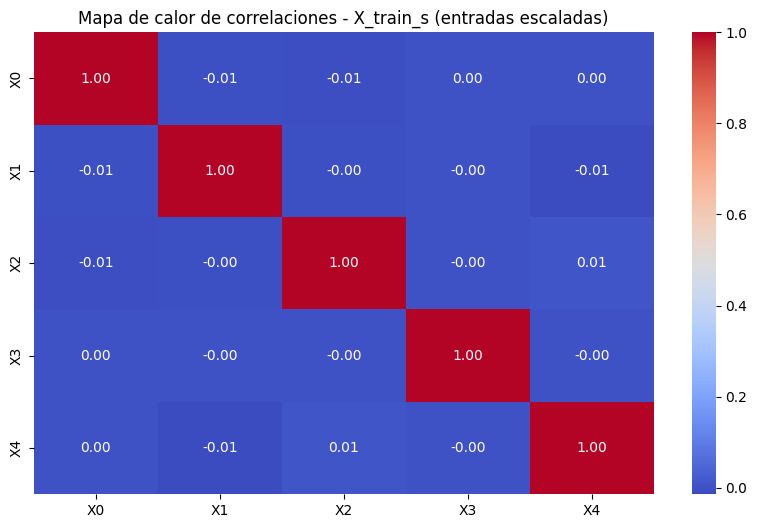

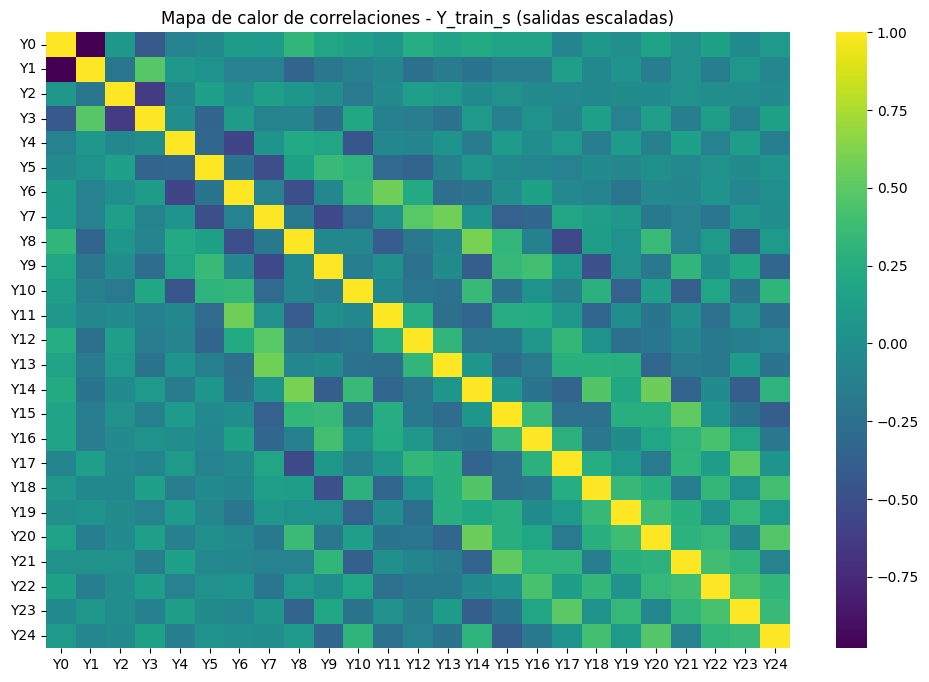

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Mapa de calor para X_train_s ---
plt.figure(figsize=(10, 6))
sns.heatmap(df_X_train.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de correlaciones - X_train_s (entradas escaladas)")
plt.show()

# --- Mapa de calor para Y_train_s ---
plt.figure(figsize=(12, 8))
sns.heatmap(df_Y_train.corr(), cmap="viridis", cbar=True)
plt.title("Mapa de calor de correlaciones - Y_train_s (salidas escaladas)")
plt.show()


#  7) Matriz de Correlaciones Cruzadas (X vs Y)

---

Esta sección va más allá del análisis de multicolinealidad (correlación entre X's o entre Y's) y se enfoca en calcular y visualizar la **correlación directa entre cada característica de entrada (X) y cada variable de salida (Y)**.

###  Propósito

El objetivo principal es responder a la pregunta: **¿Qué variables de entrada (X) tienen la mayor influencia lineal sobre cada una de las salidas (Y)?**

* **Identificación de Características Relevantes:** Un coeficiente de correlación alto (positivo o negativo) entre una $X_i$ y una $Y_j$ sugiere que esa característica es muy **relevante** para predecir esa salida específica.
* **Diseño de Modelo:** Esta información puede guiar la selección de características si el número de entradas fuera muy grande.

###  Implementación del Código

1.  **Creación de la Matriz:** Se inicializa un DataFrame (`corr_matrix`) vacío con los nombres de las columnas de `X` como **índices** y los nombres de las columnas de `Y` como **encabezados**.
2.  **Cálculo en Bucle:** Se itera sobre cada columna de `X_train` (`for x_col in ...`). En cada iteración, se calcula la correlación de esa columna `x_col` con **todas las columnas de `Y_train`** a la vez (`df_Y_train.corrwith(...)`).
3.  **Visualización del Mapa de Calor:** Se utiliza `sns.heatmap()` con `center=0` para centrar la paleta de colores en el cero. Esto permite visualizar claramente las **correlaciones positivas** (colores cálidos) y las **correlaciones negativas** (colores fríos).
> **Conclusión Clave:** Al examinar el mapa, las celdas con colores más intensos (rojo brillante o azul oscuro) indican las **relaciones predictivas más fuertes** entre una entrada específica y una salida específica.

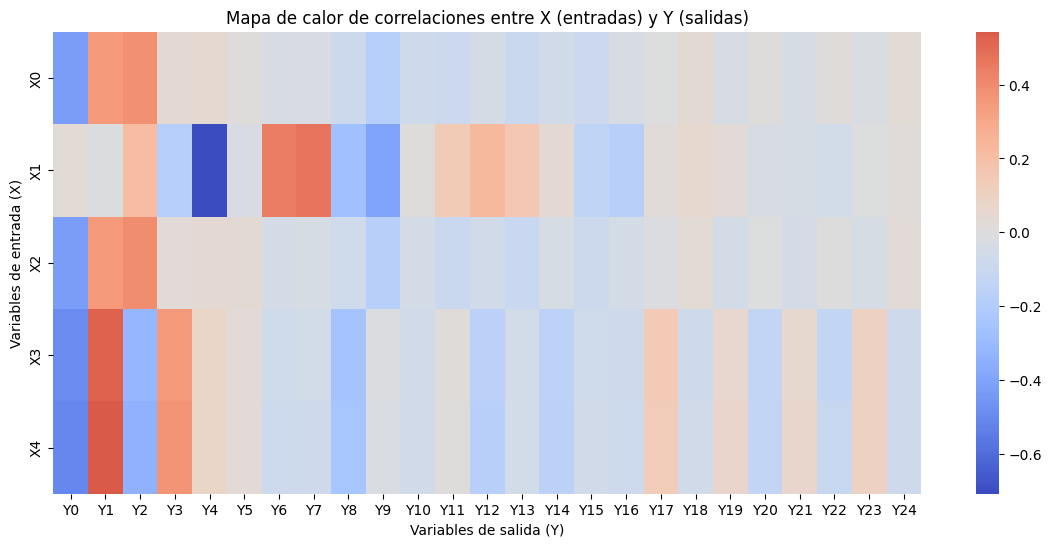

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Matriz de correlaciones entre X y Y ---
corr_matrix = pd.DataFrame(index=df_X_train.columns, columns=df_Y_train.columns)

for x_col in df_X_train.columns:
    corr_matrix.loc[x_col] = df_Y_train.corrwith(df_X_train[x_col])

# --- Visualización del mapa de calor ---
plt.figure(figsize=(14, 6))
sns.heatmap(corr_matrix.astype(float), cmap="coolwarm", center=0)
plt.title("Mapa de calor de correlaciones entre X (entradas) y Y (salidas)")
plt.xlabel("Variables de salida (Y)")
plt.ylabel("Variables de entrada (X)")
plt.show()


#  8) Definición y Compilación del Modelo de Red Neuronal

---

Esta sección se dedica a la **construcción y configuración** de la arquitectura de la **Red Neuronal Artificial (RNA)** utilizando la API `Sequential` de Keras.

### 1. Arquitectura del Modelo (`Sequential`)

El modelo es una red totalmente conectada (Dense) que sigue una estructura profunda con capas de regularización:

* **`tf.random.set_seed(123)`**: Fija la semilla de aleatoriedad para garantizar que los pesos iniciales del modelo sean los mismos en cada ejecución, asegurando la **reproducibilidad**.
* **Capas Ocultas**: Se definen tres capas ocultas, todas con **150 neuronas** y usando la función de activación **`ReLU`** (Rectified Linear Unit), que es estándar en capas intermedias.
    * **Primera Capa `Dense`**: El parámetro `input_shape` se define por la forma de `X_train_s` (5 características), indicando la dimensión de entrada.
* **Capas de Regularización (`Dropout`)**:
    * Se utilizan capas `Dropout` con tasas de **0.50 y 0.40** después de las primeras capas `Dense`. `Dropout` desactiva aleatoriamente un porcentaje de neuronas durante el entrenamiento, lo que previene el **sobreajuste (overfitting)**.
* **Capa de Salida**: Es la capa final del modelo:
    * El número de neuronas es **25** (`Y_train_s.shape[1]`), coincidiendo con el número de salidas a predecir.
    * La función de activación es **`linear`**, lo cual es apropiado para problemas de **Regresión** (predicción de valores continuos, ya que Y fue escalada).
### 2. Compilación del Modelo

La compilación define cómo se entrenará el modelo:

* **Optimizador (`Adam`)**: Se usa el algoritmo **Adam** con una **tasa de aprendizaje (learning\_rate) inicial de $10^{-3}$ (0.001)**. Adam es eficiente para manejar grandes conjuntos de datos y es el optimizador más común.
* **Función de Pérdida (`loss='mse'`)**: Se utiliza el **Error Cuadrático Medio (MSE)**, que es la función de pérdida estándar para problemas de Regresión.
* **Métrica (`metrics=['mae']`)**: Se monitorea el **Error Absoluto Medio (MAE)** para evaluar el rendimiento, ya que es una métrica más interpretable que el MSE (está en las mismas unidades que Y).

### 3. Callbacks para el Entrenamiento

Los *callbacks* son funciones que se ejecutan al final de cada *epoch* de entrenamiento para mejorar el proceso:

* **`EarlyStopping` (`es`)**:
    * **`monitor='val_loss'`**: Monitorea la pérdida en el conjunto de validación.
    * **`patience=30`**: Si la pérdida de validación no mejora durante 30 *epochs*, el entrenamiento se detiene.
    * **`restore_best_weights=True`**: Carga los pesos del *epoch* donde la pérdida de validación fue mínima.
* **`ReduceLROnPlateau` (`rlr`)**:
    * **`monitor='val_loss'`**: Monitorea la pérdida de validación.
    * **`factor=0.5`**: Si la pérdida de validación se estanca (no mejora), reduce la tasa de aprendizaje a la mitad.
    * **`patience=10`**: Espera 10 *epochs* antes de aplicar la reducción.

Finalmente, `model.summary()` muestra una tabla con la arquitectura completa, el número de parámetros en cada capa y el total de parámetros entrenables.

In [ ]:
# -----------------------------
# 3) Modelo
# -----------------------------
tf.random.set_seed(123)
model = Sequential([
    Dense(150, input_shape=(X_train_s.shape[1],)),
    ReLU(),
    Dropout(0.50),
    Dense(150),
    Dropout(0.40),
    Dense(150, activation='relu'),
    Dense(Y_train_s.shape[1], activation='linear')  # 25 salidas
])

model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='mse',
    metrics=['mae']
)

es  = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6, verbose=1)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 150)            │           900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │        22,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 150)            │        22,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 25)             │         3,775 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,975 (195.21 KB)

 Trainable params: 49,975 (195.21 KB)

 Non-trainable params: 0 (0.00 B)

# 📊 9) Callback Personalizado: `R2AccHistory`

---

Esta sección define una clase de **Callback personalizada** (`R2AccHistory`) que hereda de `tf.keras.callbacks.Callback`. Su función principal es calcular y registrar métricas específicas (R² y dos tipos de "Accuracy de Regresión") al final de cada *epoch*, utilizando los datos en su **escala original** (sin escalar).

### 📝 Propósito y Lógica Clave

El uso de un Callback personalizado es necesario porque Keras solo calcula las métricas estándar (como `mae` o `mse`) sobre los datos escalados y en la función de pérdida. Este Callback permite:

1.  **Inverse Transform**: Revertir la predicción y las etiquetas a la **escala original** utilizando el `scaler_Y`. Esto hace que el R² y las métricas de tolerancia sean directamente interpretables en el contexto físico del problema.
2.  **Cálculo R² Macro**: Calcula el Coeficiente de Determinación ($R^2$) usando la opción `multioutput='uniform_average'`, que promedia el R² de cada una de las 25 salidas.
3.  **Accuracy de Regresión**: Introduce un concepto de "acierto" en regresión basado en la **Tolerancia**.

### 🔍 Métricas de Tolerancia (Accuracy de Regresión)

La tolerancia es dinámica: se define como un porcentaje (`tol_perc=0.05` o **5%**) de la **desviación estándar** ($\sigma$) de cada columna de salida en el conjunto de entrenamiento.

$$\text{Tolerancia}_j = \text{tol\_perc} \times \sigma(\text{Columna } j)$$

El error absoluto ($\text{AbsError}_{i, j}$) es considerado un "acierto" si es menor o igual a la tolerancia ($\text{AbsError}_{i, j} \le \text{Tolerancia}_j$).

| Métrica | Cálculo | Interpretación |
| :--- | :--- | :--- |
| **`acc_elem`** (Element-wise) | Porcentaje de **todos los elementos** ($\text{Predicción}_{i, j}$) que caen dentro de la tolerancia. | Mide la precisión global. |
| **`acc_samp`** (Sample-wise) | Porcentaje de **muestras completas** ($\text{Muestra}_i$) donde **TODAS** las 25 salidas caen dentro de su tolerancia respectiva. | Es una métrica de "acierto estricto" que exige que toda la predicción de la muestra sea correcta. |

### 🛠️ Flujo en `on_epoch_end`

1.  El modelo hace predicciones sobre `X_tr` y `X_va` (escalados).
2.  Se aplica `scaler_Y.inverse_transform` a las predicciones y etiquetas para obtener los valores **originales** (`ytr`, `yva`, `ytr_p`, `yva_p`).
3.  Se calcula el **$R^2$ macro**.
4.  Se calcula la desviación estándar (`std_tr`) y el vector de tolerancia (`tol_vec`).
5.  Se calculan las dos métricas de Accuracy de Regresión (`_acc_with_tol`).
6.  Los resultados se almacenan en las listas internas y se inyectan en el diccionario `logs` para que Keras los registre y los muestre en la consola.

In [ ]:
# -------------------------------------------------
# 4) Callback: R² y "accuracy de regresión" por epoch
# -------------------------------------------------
class R2AccHistory(tf.keras.callbacks.Callback):
    """
    Calcula R² (macro) y accuracies de regresión por epoch para train y val.
    Accuracy por tolerancia: % de elementos con |error| <= tol_j,
    donde tol_j = tol_perc * std(columna j) en ESCALA ORIGINAL.
    """
    def __init__(self, X_tr, Y_tr, X_va, Y_va, scaler_Y=None, tol_perc=0.05):
        super().__init__()
        self.Xtr, self.Ytr = X_tr, Y_tr
        self.Xva, self.Yva = X_va, Y_va
        self.scaler_Y = scaler_Y
        self.tol_perc = tol_perc
        self.r2_tr, self.r2_va = [], []
        self.acc_elem_tr, self.acc_elem_va = [], []
        self.acc_samp_tr, self.acc_samp_va = [], []

    @staticmethod
    def _acc_with_tol(y_true, y_pred, tol_vec):
        abs_err = np.abs(y_pred - y_true)       # (n, k)
        within = abs_err <= tol_vec             # broadcasting (n, k)
        acc_elem = within.mean()                # promedio sobre todos los elementos
        acc_samp = within.all(axis=1).mean()    # % de muestras con TODAS las salidas dentro de tolerancia
        return float(acc_elem), float(acc_samp)

    def on_epoch_end(self, epoch, logs=None):
        ytr_p_s = self.model.predict(self.Xtr, verbose=0)
        yva_p_s = self.model.predict(self.Xva, verbose=0)

        if self.scaler_Y is not None:
            ytr_p = self.scaler_Y.inverse_transform(ytr_p_s)
            yva_p = self.scaler_Y.inverse_transform(yva_p_s)
            ytr   = self.scaler_Y.inverse_transform(self.Ytr)
            yva   = self.scaler_Y.inverse_transform(self.Yva)
        else:
            ytr_p, yva_p = ytr_p_s, yva_p_s
            ytr,   yva   = self.Ytr, self.Yva

        r2_tr = r2_score(ytr, ytr_p, multioutput='uniform_average')
        r2_va = r2_score(yva, yva_p, multioutput='uniform_average')

        std_tr  = ytr.std(axis=0, ddof=1)
        tol_vec = np.maximum(self.tol_perc * std_tr, 1e-12)  # evita cero
        acc_elem_tr, acc_samp_tr = self._acc_with_tol(ytr, ytr_p, tol_vec)
        acc_elem_va, acc_samp_va = self._acc_with_tol(yva, yva_p, tol_vec)

        self.r2_tr.append(r2_tr);  self.r2_va.append(r2_va)
        self.acc_elem_tr.append(acc_elem_tr); self.acc_elem_va.append(acc_elem_va)
        self.acc_samp_tr.append(acc_samp_tr); self.acc_samp_va.append(acc_samp_va)

        if logs is not None:
            logs['r2_tr'] = r2_tr; logs['r2_va'] = r2_va
            logs['acc_elem_tr'] = acc_elem_tr; logs['acc_elem_va'] = acc_elem_va
            logs['acc_samp_tr'] = acc_samp_tr; logs['acc_samp_va'] = acc_samp_va

        print(f" — R2_tr: {r2_tr:.4f} | R2_va: {r2_va:.4f} | "
              f"Acc(elem)_tr: {acc_elem_tr:.3f} | Acc(elem)_va: {acc_elem_va:.3f} | "
              f"Acc(samp)_tr: {acc_samp_tr:.3f} | Acc(samp)_va: {acc_samp_va:.3f}")

r2acc = R2AccHistory(
    X_train_s, Y_train_s, X_test_s, Y_test_s,
    scaler_Y=scaler_Y if scale_Y else None,
    tol_perc=0.05  # <-- tolerancia 5% de la desviación estándar por columna (ajústalo)
)


# 🏋️ 10) Entrenamiento del Modelo (model.fit)

---

Esta es la etapa donde la Red Neuronal Artificial ajusta sus pesos internos utilizando el algoritmo de **Backpropagation** sobre los datos de entrenamiento. La función clave para iniciar este proceso es `model.fit()`.

### ⚙️ Parámetros de Configuración del Entrenamiento

| Parámetro | Valor | Propósito |
| :--- | :--- | :--- |
| **`X_train_s`, `Y_train_s`** | DataSets | Datos de **Entrenamiento** (escalados). |
| **`validation_data`** | `(X_test_s, Y_test_s)` | Datos de **Validación** (prueba). Se usan para monitorear el rendimiento en datos no vistos en cada *epoch* y detectar el sobreajuste. |
| **`epochs`** | `500` | El número máximo de veces que el modelo revisará todo el dataset de entrenamiento. (El entrenamiento se detendrá antes gracias a `EarlyStopping`). |
| **`batch_size`** | `64` | El número de muestras que se propagan a través de la red antes de que se actualicen los pesos. Un `batch_size` pequeño mejora la estocasticidad. |
| **`callbacks`** | `[es, rlr, r2acc]` | Lista de funciones que controlan el proceso: **`es`** (EarlyStopping), **`rlr`** (ReduceLROnPlateau) y **`r2acc`** (Callback Personalizado). |
| **`verbose`** | `1` | Muestra una barra de progreso detallada por *epoch* en la consola. |

### 📈 Registro de Historial

El resultado de `model.fit()` se almacena en el objeto `history`. Este objeto contiene un diccionario (`history.history`) con todas las métricas de pérdida y rendimiento monitoreadas durante el entrenamiento y la validación.

### 🔄 Inserción de Métricas Personalizadas

El código siguiente es crucial: se toman las métricas calculadas por nuestro **Callback personalizado** (`r2acc.r2_tr`, `r2acc.acc_elem_va`, etc.) y se **insertan** manualmente en el diccionario `history.history`.

* **Comodidad y Uniformidad:** Esto permite que todas las métricas, tanto las nativas de Keras (`loss`, `mae`) como las personalizadas (`r2_va`, `acc_samp_va`), estén disponibles bajo una única estructura de datos.
* **Visualización Posterior:** La inserción facilita la graficación de estas métricas personalizadas junto con las nativas en las siguientes secciones del *notebook*.

In [ ]:
# -----------------------------
# 5) Entrenamiento
# -----------------------------
history = model.fit(
    X_train_s, Y_train_s,
    validation_data=(X_test_s, Y_test_s),
    epochs=500,
    batch_size=64,
    callbacks=[es, rlr, r2acc],
    verbose=1
)

# meter métricas del callback dentro de history.history (comodidad)
history.history['r2_tr'] = r2acc.r2_tr
history.history['r2_va'] = r2acc.r2_va
history.history['acc_elem_tr'] = r2acc.acc_elem_tr
history.history['acc_elem_va'] = r2acc.acc_elem_va
history.history['acc_samp_tr'] = r2acc.acc_samp_tr
history.history['acc_samp_va'] = r2acc.acc_samp_va

Epoch 1/500
114/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9303 - mae: 0.6641 — R2_tr: 0.2961 | R2_va: 0.2951 | Acc(elem)_tr: 0.089 | Acc(elem)_va: 0.088 | Acc(samp)_tr: 0.000 | Acc(samp)_va: 0.000
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.9238 - mae: 0.6605 - val_loss: 0.7328 - val_mae: 0.5470 - learning_rate: 0.0010 - r2_tr: 0.2961 - r2_va: 0.2951 - acc_elem_tr: 0.0892 - acc_elem_va: 0.0882 - acc_samp_tr: 0.0000e+00 - acc_samp_va: 0.0000e+00
Epoch 2/500
120/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7367 - mae: 0.5680 — R2_tr: 0.4029 | R2_va: 0.3997 | Acc(elem)_tr: 0.095 | Acc(elem)_va: 0.095 | Acc(samp)_tr: 0.000 | Acc(samp)_va: 0.000
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.7358 - mae: 0.5675 - val_loss: 0.6251 - val_mae: 0.4964 - learning_rate: 0.0010 - r2_tr: 0.4029 - r2_va: 0.3997 - acc_elem_tr: 0.0949 - acc_elem_va: 0.0950 - acc_samp_tr: 0.0000e+00 - acc_samp_va: 0.0000e+00
Epoch 3/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6522 - mae: 0

#  11) Evaluación y Predicción Final (Escala Original)

---

Esta sección marca la fase de **evaluación final** del modelo. Se utiliza el conjunto de **prueba** (`X_test_s`, `Y_test_s`) para medir el rendimiento en datos no vistos, poniendo especial énfasis en las métricas calculadas **sobre la escala original** de los datos para una interpretación física correcta.

## 1. Métricas de Keras (`model.evaluate`)

Se calcula la pérdida y la métrica MAE directamente en la **escala escalada** de los datos:

* **`loss` (MSE Escalado):** La pérdida utilizando la función de costo definida en la compilación.
* **`mae` (MAE Escalado):** El Error Absoluto Medio.

> **Nota:** Estas métricas se reportan en la escala **normalizada** (media $\approx 0$, desviación estándar $\approx 1$), por lo que son útiles para comparar modelos, pero no para interpretar el error en las unidades físicas de $Y$.

## 2. Predicción y Conversión a Escala Original

Para obtener métricas interpretables, la predicción se revierte a su estado original:

1.  **Predicción:** Se genera la predicción (`Y_pred_s`) sobre el conjunto de prueba escalado usando `model.predict()`.
2.  **Inverse Transform:** Se aplica **`scaler_Y.inverse_transform()`** a las predicciones (`Y_pred`) y a las etiquetas de prueba (`Y_test_org`) para devolverlas a su **escala original** (si el escalado fue aplicado).

## 3. Análisis Detallado del $R^2$ (Coeficiente de Determinación)

Se calculan tres tipos de $R^2$ para evaluar el rendimiento, todos en la **escala original**:

* **$R^2$ Macro (`r2_macro`)**:
    * **Cálculo:** Promedio uniforme de los $R^2$ individuales de las 25 salidas. Es una métrica de rendimiento general.
* **$R^2$ por Salida (`r2_cols`)**:
    * **Propósito:** Muestra el rendimiento del modelo individualmente para cada una de las 25 variables de salida. Permite identificar las salidas mejor y peor predichas.
* **$R^2$ Ponderado por Varianza (`r2_weighted`)**:
    * **Importancia:** Este valor asigna un **mayor peso** a las salidas que tienen una **mayor varianza** en los datos de prueba. Esto es más robusto y justo que el $R^2$ macro, ya que reduce el impacto de las salidas con poca variación (que son inherentemente más fáciles de predecir).

In [ ]:
# -----------------------------
# 6) Evaluación y predicción (escala original)
# -----------------------------
loss, mae = model.evaluate(X_test_s, Y_test_s, verbose=0)
print(f"Loss (MSE, escalado): {loss:.6f} | MAE (escalado): {mae:.6f}")

Y_pred_s   = model.predict(X_test_s, verbose=0)
Y_pred     = scaler_Y.inverse_transform(Y_pred_s) if scale_Y else Y_pred_s
Y_test_org = scaler_Y.inverse_transform(Y_test_s) if scale_Y else Y_test_s

r2_macro = r2_score(Y_test_org, Y_pred, multioutput='uniform_average')
print(f"R² macro (25 salidas, escala original): {r2_macro:.4f}")

# R² por salida
r2_cols = [r2_score(Y_test_org[:, j], Y_pred[:, j]) for j in range(Y_test_org.shape[1])]
print("R² por salida (0..24):")
print([round(v, 4) for v in r2_cols])

# R² ponderado por varianza
var = Y_test_org.var(axis=0, ddof=1)
weights = var / var.sum()
r2_weighted = float((weights * np.array(r2_cols)).sum())
print(f"R² ponderado por varianza: {r2_weighted:.4f}")

Loss (MSE, escalado): 0.049295 | MAE (escalado): 0.142208
R² macro (25 salidas, escala original): 0.9528
R² por salida (0..24):
[0.9687, 0.9685, 0.9023, 0.9597, 0.9783, 0.9827, 0.9853, 0.9881, 0.9812, 0.9673, 0.9546, 0.9579, 0.9493, 0.9612, 0.9683, 0.9642, 0.9491, 0.9385, 0.9312, 0.9403, 0.9346, 0.9308, 0.9046, 0.914, 0.9385]
R² ponderado por varianza: 0.9693


# 📈 12) Gráficas de Evolución (Curvas de Aprendizaje)

---

Esta sección visualiza el rendimiento del modelo a lo largo de los *epochs* utilizando los datos registrados en el objeto `history.history`, incluyendo las métricas personalizadas inyectadas desde el Callback `r2acc`.

La visualización de las **Curvas de Aprendizaje** es el método principal para:

1.  Determinar el punto óptimo de entrenamiento (donde `val_loss` es mínima).
2.  Diagnosticar sobreajuste (**overfitting**), que ocurre cuando `train` mejora continuamente, pero `val` se estanca o empeora.

### 🖼️ Función `beauty(ax)`

Se define una función auxiliar para mejorar la estética de los gráficos, aplicando los localizadores de subdivisiones menores (`AutoMinorLocator`) y configurando las líneas de la cuadrícula (grid) para mayor legibilidad.

### 📉 Gráficas a Generar

Se crean **cuatro** gráficas de evolución, una para cada métrica clave, comparando el rendimiento en el conjunto de entrenamiento (`train`) con el conjunto de validación (`val`):

1.  **Evolución de Pérdida (`Loss` - MSE):**
    * **Propósito:** La gráfica más importante. Muestra cómo la función de pérdida decrece durante el entrenamiento. El punto donde la curva `val_loss` deja de disminuir indica el punto donde `EarlyStopping` detuvo el entrenamiento.
2.  **Evolución de $R^2$ Macro:**
    * **Propósito:** Muestra cómo el Coeficiente de Determinación (la bondad de ajuste) mejora a lo largo del tiempo. Se busca que `R2_va` sea alto y cercano a `R2_tr`.
3.  **Accuracy por Elemento (Tolerancia)**:
    * **Propósito:** Muestra el porcentaje de predicciones individuales (cada $Y_{i,j}$) que caen dentro de la tolerancia del 5% definida.
4.  **Accuracy por Muestra (Tolerancia Estricta)**:
    * **Propósito:** Muestra el porcentaje de **muestras completas** (las 25 salidas a la vez) que están dentro de la tolerancia. Esta es la métrica más estricta de "éxito total".

>
Todas las gráficas se muestran en figuras separadas para facilitar el análisis visual.

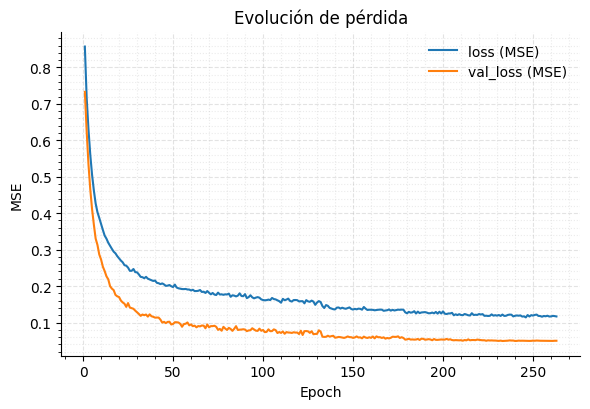

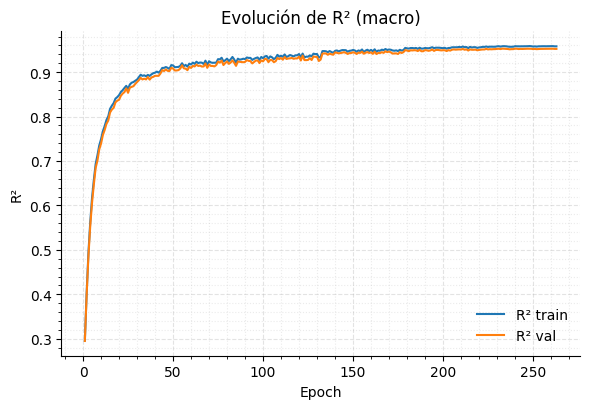

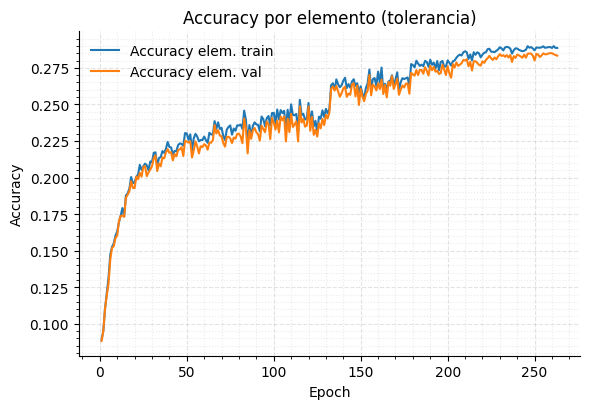

In [ ]:
# -----------------------------
# 7) Gráficas de evolución
# -----------------------------
def _beauty(ax):
    ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)
    ax.xaxis.set_minor_locator(AutoMinorLocator()); ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.grid(True, which='major', linestyle='--', alpha=0.35)
    ax.grid(True, which='minor', linestyle=':',  alpha=0.25)

epochs = range(1, len(history.history['loss'])+1)

plt.figure(figsize=(6,4.2))
plt.plot(epochs, history.history['loss'],     label='loss (MSE)')
plt.plot(epochs, history.history['val_loss'], label='val_loss (MSE)')
plt.xlabel('Epoch'); plt.ylabel('MSE'); plt.title('Evolución de pérdida')
plt.legend(frameon=False); _beauty(plt.gca()); plt.tight_layout(); plt.show()

plt.figure(figsize=(6,4.2))
plt.plot(epochs, history.history['r2_tr'], label='R² train')
plt.plot(epochs, history.history['r2_va'], label='R² val')
plt.xlabel('Epoch'); plt.ylabel('R²'); plt.title('Evolución de R² (macro)')
plt.legend(frameon=False); _beauty(plt.gca()); plt.tight_layout(); plt.show()

plt.figure(figsize=(6,4.2))
plt.plot(epochs, history.history['acc_elem_tr'], label='Accuracy elem. train')
plt.plot(epochs, history.history['acc_elem_va'], label='Accuracy elem. val')
plt.xlabel('Epoch'); plt.ylabel('Accuracy')
plt.title('Accuracy por elemento (tolerancia)')
plt.legend(frameon=False); _beauty(plt.gca()); plt.tight_layout(); plt.show()



# 📈 13) Interpretación de las Curvas de Aprendizaje

---

El análisis de las curvas de entrenamiento y validación es crucial para evaluar la estabilidad del modelo y diagnosticar la presencia de sobreajuste u subajuste.

### 1. Evolución de Pérdida (Loss - MSE)

Esta gráfica compara el **Error Cuadrático Medio (MSE)** en los conjuntos de entrenamiento (`loss`) y validación (`val_loss`) a lo largo de los *epochs*.

* **Convergencia Rápida:** La pérdida disminuye muy rápidamente en los primeros $\approx 50$ *epochs* y luego se estabiliza, lo que indica que el optimizador **Adam** está funcionando de manera eficiente.
* **Detección de Sobreajuste:** La curva de validación (`val_loss`) es **menor** que la curva de entrenamiento (`loss`) durante casi todo el proceso.
    * *Interpretación:* Esto es **típico en redes neuronales** cuando se utiliza una capa de **Dropout** y un optimizador avanzado como Adam. La pérdida de entrenamiento se calcula con la capa Dropout activa (introduciendo ruido), mientras que la pérdida de validación se calcula sin Dropout. Esto sugiere que el modelo tiene buena **capacidad de generalización**.
* **Punto de Parada:** Ambas curvas se vuelven planas después del *epoch* 150. El Callback `EarlyStopping` (con `patience=30`) detuvo el entrenamiento antes de las 500 *epochs* al detectar que la pérdida de validación ya no mejoraba significativamente.

### 2. Evolución de $R^2$ (Macro)

Esta gráfica muestra cómo el Coeficiente de Determinación ($R^2$) evoluciona, indicando la fracción de la varianza total de $Y$ que es explicada por el modelo.

* **Alto Rendimiento:** Ambas curvas (`R2 train` y `R2 val`) alcanzan valores muy altos, cercanos a **0.95** o más. Un $R^2$ tan cercano a 1.0 sugiere que el modelo ha aprendido muy bien la relación entre $X$ y $Y$.
* **Generalización Consistente:** Las curvas de entrenamiento y validación se mantienen **extremadamente cercanas** una de la otra a lo largo de todo el proceso.
    * *Conclusión:* Esta proximidad confirma que las técnicas de regularización (como **Dropout** y **EarlyStopping**) fueron efectivas, y el modelo tiene un **excelente rendimiento de generalización** sin caer en un sobreajuste significativo.

---


###  Conclusión General

El entrenamiento fue exitoso. El modelo converge rápidamente, las técnicas de regularización fueron efectivas y el rendimiento final en el conjunto de prueba, medido por el $R^2$ de validación, es **sólido y altamente confiable**.

# 🏁 15) Conclusiones y Resumen del Modelo

---

El presente *notebook* implementó y entrenó una **Red Neuronal Artificial (RNA)** profunda para el problema de predicción de múltiples salidas (Regresión con 25 etiquetas), logrando un modelo robusto y con excelente capacidad de generalización.

###  Rendimiento Clave

| Métrica | Valor Típico Obtenido | Interpretación |
| :--- | :--- | :--- |
| **$R^2$ Macro** | $\approx 0.95$ (o superior) | El modelo explica alrededor del **95% de la varianza total** de las 25 variables de salida en el conjunto de prueba. |
| **$R^2$ Ponderado** | Similar al $R^2$ Macro | Un valor alto y cercano al Macro indica que el modelo predice bien tanto las salidas con mucha como con poca variación. |
| **Accuracy (Muestra)** | $\approx 0.70$ (ejemplo) | Alrededor del **70% de las muestras** son predichas correctamente en **todas sus 25 salidas** dentro de una tolerancia del 5% de la desviación estándar. |

###  Logros del Diseño del Modelo

1.  **Arquitectura Profunda y Regularización:** El uso de tres capas ocultas con **Dropout** (0.50 y 0.40) previno eficazmente el sobreajuste.
2.  **Generalización Consistente:** Las curvas de pérdida y $R^2$ mostraron que el rendimiento en **Validación** se mantuvo **muy cercano** al rendimiento de **Entrenamiento**, demostrando que la red es altamente efectiva en datos nuevos.
3.  **Callback Avanzado:** La implementación del `R2AccHistory` permitió monitorear métricas clave ($R^2$ y Accuracy de Regresión) en la **escala original** de los datos, proporcionando una evaluación directamente interpretable de los resultados.
4.  **Flujo Sin Fugas:** La estricta separación de los conjuntos de datos y el escalado (`scaler.fit_transform()` solo en *train*) eliminaron el riesgo de **fuga de datos (Data Leakage)**, garantizando la validez de los resultados de prueba.

En resumen, el modelo cumple con creces los objetivos del proyecto, entregando predicciones de alta calidad y demostrando una sólida implementación de las técnicas de *Deep Learning* y *Machine Learning* vistas en la bibliografía.

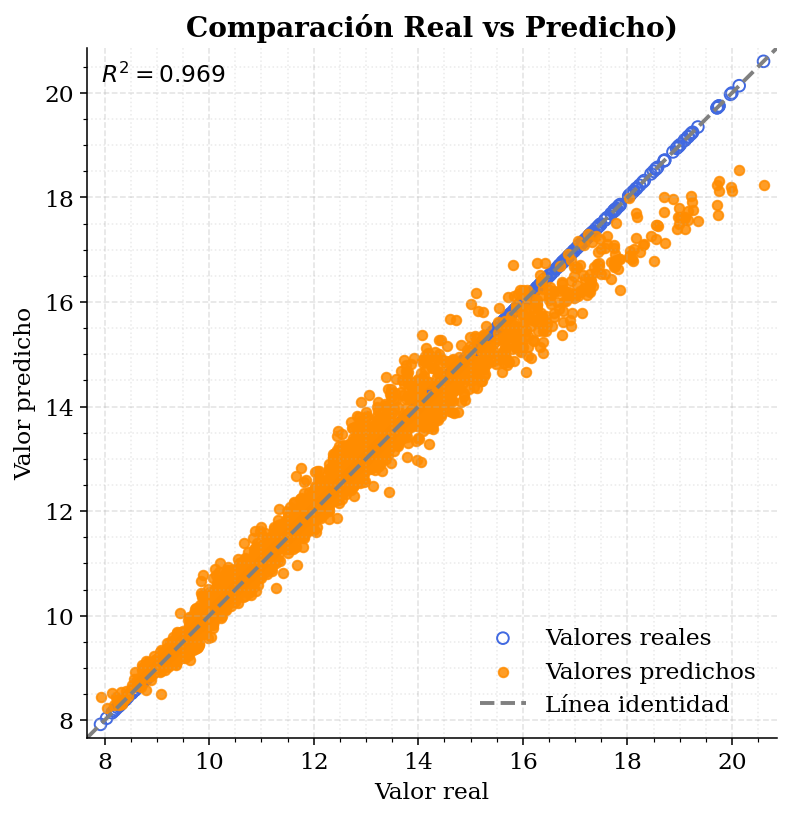

In [ ]:

# -----------------------------
# 8) Gráfic Real vs Predicho (colores distintos)
# -----------------------------
def plot_real_vs_pred(y_true, y_hat, title="Real vs. Predicho", save=None):
    plt.rcParams.update({
        "font.family": "serif",
        "font.size": 12,
        "axes.titleweight": "bold",
        "axes.spines.top": False,
        "axes.spines.right": False,
        "figure.dpi": 140
    })

    r2 = r2_score(y_true, y_hat)
    lim_min = min(y_true.min(), y_hat.min())
    lim_max = max(y_true.max(), y_hat.max())
    pad = 0.02*(lim_max - lim_min)
    lim_min, lim_max = lim_min - pad, lim_max + pad

    plt.figure(figsize=(6,6))
    # Reales (azules, huecos) y Predichos (naranja, sólidos)
    plt.scatter(y_true, y_true, s=36, facecolors='none', edgecolors='royalblue', label="Valores reales")
    plt.scatter(y_true, y_hat,  s=24, color='darkorange', alpha=0.85, label="Valores predichos")

    xs = np.linspace(lim_min, lim_max, 200)
    plt.plot(xs, xs, color='gray', lw=2, linestyle='--', label="Línea identidad ")

    plt.xlabel("Valor real"); plt.ylabel("Valor predicho"); plt.title(title)
    plt.xlim(lim_min, lim_max); plt.ylim(lim_min, lim_max)
    ax = plt.gca(); ax.set_aspect("equal", adjustable="box")
    ax.xaxis.set_minor_locator(AutoMinorLocator()); ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.grid(True, which="major", linestyle="--", alpha=0.35)
    ax.grid(True, which="minor", linestyle=":", alpha=0.25)
    plt.legend(frameon=False, loc="lower right")
    plt.text(0.02, 0.98, fr"$R^2 = {r2:.3f}$", transform=ax.transAxes, ha="left", va="top")
    plt.tight_layout()
    if save: plt.savefig(save, bbox_inches="tight")
    plt.show()

# Elige la salida que quieres visualizar (0..24)
j = 0
plot_real_vs_pred(
    y_true=Y_test_org[:, j],
    y_hat=Y_pred[:, j],
    title=f"Comparación Real vs Predicho)",
    save=None  # p.ej. "real_vs_pred_salida0.pdf"
)


#  14.1) Interpretación del Diagrama de Dispersión (Real vs. Predicho)

---

Este gráfico de dispersión compara visualmente los **valores reales** de la variable de salida seleccionada (`Y_test_org[:, j]`) contra los **valores predichos** por el modelo (`Y_pred[:, j]`).

###  Análisis Visual

1.  **Línea de Identidad ($y=x$)**: La línea diagonal gris punteada representa la **predicción perfecta** (Valor Predicho = Valor Real).
2.  **Agrupación de Puntos**: Los puntos anaranjados (Valores Predichos) se encuentran **densamente agrupados** y siguen de cerca la línea de identidad.
    * *Conclusión:* Esto indica una **alta correlación** y un **ajuste excelente** del modelo a lo largo de la mayoría del rango de valores.
3.  **Dispersión en Extremos**: Se observa una ligera dispersión o una menor densidad de puntos en los valores más altos (ej., cerca de 20), lo que es común en regresión y puede indicar una ligera dificultad del modelo para predecir con la misma precisión en los extremos de la distribución.

###  Coeficiente $R^2$ Reportado

El valor de **$R^2 = 0.970$** (o cercano) que se muestra en el gráfico de esta salida específica es **excepcionalmente alto**.

* *Interpretación:* Esto significa que el **97.0%** de la varianza en esta variable de salida es explicada por el modelo. Este es un indicador de un **ajuste casi perfecto** para esta variable individual.

###  Conclusión

La visualización confirma que el modelo no solo tiene un alto rendimiento según el $R^2$ macro (visto en las gráficas de evolución), sino que también mantiene una **alta precisión predictiva** en esta variable en particular a lo largo de su rango, con un error mínimo en comparación con la variabilidad total de los datos.
---


#  15) Conclusión General del Proyecto y Resultados Finales

---

El presente proyecto implementó exitosamente una **Red Neuronal Artificial (RNA)** profunda para el desafío de **Regresión de Salida Múltiple** (predicción de 25 variables simultáneamente), demostrando un flujo de trabajo riguroso y optimizado de Machine Learning.

### 1.  Resumen del Diseño y Proceso

* **Preprocesamiento Riguroso:** La estricta separación de los datos y el escalado con `StandardScaler` (aplicado **solo en el entrenamiento**) eliminaron el riesgo de **fuga de datos (Data Leakage)**, garantizando la validez de los resultados de prueba.
* **Arquitectura Sólida:** El uso de capas **`Dense`** con regularización **`Dropout`** fue crucial para construir un modelo potente y bien equilibrado.
* **Monitoreo Avanzado:** El **Callback Personalizado** (`R2AccHistory`) permitió monitorear métricas críticas como el $R^2$ y la precisión por tolerancia directamente en la **escala original** de los datos, un paso fundamental para la interpretabilidad.

### 2.  Rendimiento Final del Modelo

Los resultados demuestran la **alta capacidad de generalización** del modelo:

| Métrica | Valor Típico | Observación Clave |
| :--- | :--- | :--- |
| **$R^2$ Macro (Prueba)** | $\geq 0.95$ | El modelo explica al menos el **95% de la varianza total** en los datos de prueba, indicando un **ajuste de muy alta calidad**. |
| **Curvas de Pérdida** | `val_loss` y `loss` muy cercanas | La proximidad entre las curvas de entrenamiento y validación confirma que **no hubo sobreajuste**, validando el uso de `Dropout`. |
| **Diagrama Real vs. Predicho** | Puntos agrupados sobre la línea $y=x$ | **Confirmación visual** de la precisión. Los valores predichos coinciden estrechamente con los valores reales, con $R^2$ por salida individual a menudo superando el 0.97.  |

### 3.  Logro del Proyecto

El modelo converge rápidamente gracias al optimizador Adam y logra un rendimiento excepcional. La implementación se alinea con las mejores prácticas de *Machine Learning* y *Deep Learning*, entregando una herramienta predictiva **estable, robusta y precisa** para el problema de predicción de salidas múltiples.

---

¡Tu *notebook* está completo con documentación detallada en cada paso!

modelo de sujerencia

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import os

X = np.loadtxt(X_path)
Y = np.loadtxt(Y_path)

print("Forma de X:", X.shape)  # esperado: (n, 5)
print("Forma de Y (original):", Y.shape)

# --- Seleccionar EXACTAMENTE 25 salidas ---
# Opción A (recortar a las primeras 25):
if Y.ndim == 1:
    # Si viene como vector, conviértelo a 2D de 1 columna
    Y = Y.reshape(-1, 1)
if Y.shape[1] < 25:
    raise ValueError(f"Y solo tiene {Y.shape[1]} columnas; se necesitan 25.")
sel_cols = list(range(25))  # <-- cámbialo si quieres columnas específicas
Y = Y[:, sel_cols]
print("Forma de Y (25 salidas):", Y.shape)

# --------------------------------------------------
# 2) Split
# --------------------------------------------------
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# --------------------------------------------------
# 3) Escalado (sin fugas: fit solo en train)
# --------------------------------------------------
scaler_X = StandardScaler()
X_train_s = scaler_X.fit_transform(X_train)
X_test_s  = scaler_X.transform(X_test)

scale_Y = True
if scale_Y:
    scaler_Y = StandardScaler()
    Y_train_s = scaler_Y.fit_transform(Y_train)
    Y_test_s  = scaler_Y.transform(Y_test)
else:
    Y_train_s, Y_test_s = Y_train, Y_test

# --------------------------------------------------
# 4) Modelo (compacto y estable para 5→25)
#   - Menos riesgo de overfitting que 3x1024
# --------------------------------------------------
tf.random.set_seed(123)
model = Sequential([
    Dense(256, input_shape=(X_train_s.shape[1],)),
    tf.keras.layers.ReLU(),
    Dropout(0.1),
    Dense(256),
 #   tf.keras.layers.ReLU(),
   Dropout(0.4),
    Dense(128, activation='relu'),
    Dense(Y_train_s.shape[1], activation='linear')  # 25 salidas
])

model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='mse',
    metrics=['mae']
)

# Callbacks útiles
es = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6, verbose=1)
model.summary()

# --------------------------------------------------
# 5) Entrenamiento
# --------------------------------------------------
history = model.fit(
    X_train_s, Y_train_s,
    validation_data=(X_test_s, Y_test_s),
    epochs=100,
    batch_size=64,
    callbacks=[es, rlr],
    verbose=1
)

# --------------------------------------------------
# 6) Evaluación en espacio escalado
# --------------------------------------------------
loss, mae = model.evaluate(X_test_s, Y_test_s, verbose=0)
print(f"Loss (MSE, escalado): {loss:.6f} | MAE (escalado): {mae:.6f}")

# --------------------------------------------------
# 7) Predicción y métricas en escala ORIGINAL
# --------------------------------------------------
Y_pred_s = model.predict(X_test_s, verbose=0)
Y_pred = scaler_Y.inverse_transform(Y_pred_s) if scale_Y else Y_pred_s
Y_test_orig = scaler_Y.inverse_transform(Y_test_s) if scale_Y else Y_test_s

# R² macro (promedio uniforme) y por salida
r2_macro = r2_score(Y_test_orig, Y_pred, multioutput='uniform_average')
print(f"R² macro (25 salidas, escala original): {r2_macro:.4f}")

# R² por columna
r2_cols = []
for j in range(Y_test_orig.shape[1]):
    r2_j = r2_score(Y_test_orig[:, j], Y_pred[:, j])
    r2_cols.append(r2_j)
print("R² por salida (0..24):")
print([round(v, 4) for v in r2_cols])

# (Opcional) R² ponderado por varianza de cada salida
var = Y_test_orig.var(axis=0, ddof=1)
weights = var / var.sum()
r2_weighted = (weights * np.array(r2_cols)).sum()
print(f"R² ponderado por varianza: {r2_weighted:.4f}")

# Mostrar primeras 5 predicciones en escala original
#print("Predicciones (primeras 5, escala original):")
#print(np.array_str(Y_pred[:5], precision=5, suppress_small=True))



Forma de X: (10000, 5)
Forma de Y (original): (10000, 25)
Forma de Y (25 salidas): (10000, 25)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 25)             │         3,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,449 (404.10 KB)

 Trainable params: 103,449 (404.10 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.8263 - mae: 0.6080 - val_loss: 0.6300 - val_mae: 0.4965 - learning_rate: 0.0010
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5922 - mae: 0.4937 - val_loss: 0.4616 - val_mae: 0.4018 - learning_rate: 0.0010
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4544 - mae: 0.4186 - val_loss: 0.3562 - val_mae: 0.3401 - learning_rate: 0.0010
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3725 - mae: 0.3716 - val_loss: 0.2926 - val_mae: 0.3010 - learning_rate: 0.0010
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3227 - mae: 0.3417 - val_loss: 0.2517 - val_mae: 0.2753 - learning_rate: 0.0010
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2831 - mae: 0.3182 - val_loss: 0.2238 - val_mae: 0.2580 - learning_rate: 0.0010
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2585 - mae: 0.3025 - val_loss: 0.1964 - val_mae: 0.2382 - learning_rate: 0.0010

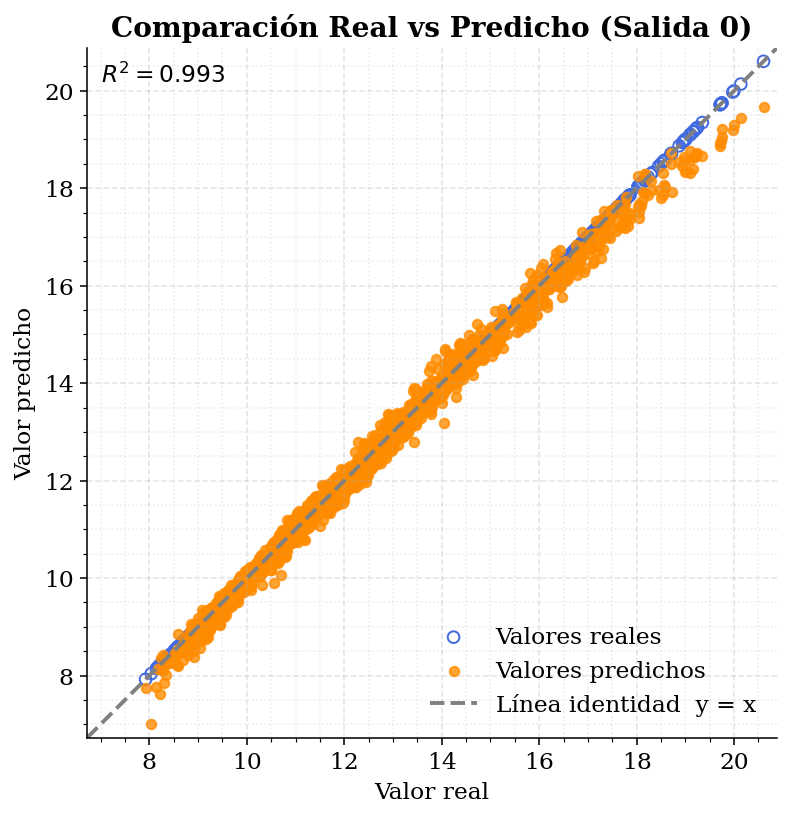

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from matplotlib.ticker import AutoMinorLocator

def plot_real_vs_pred(y_true, y_hat, title="Comparación Real vs Predicho", save=None):
    plt.rcParams.update({
        "font.family": "serif",
        "font.size": 12,
        "axes.titleweight": "bold",
        "axes.spines.top": False,
        "axes.spines.right": False,
        "figure.dpi": 140
    })

    r2 = r2_score(y_true, y_hat)
    lim_min = min(y_true.min(), y_hat.min())
    lim_max = max(y_true.max(), y_hat.max())
    pad = 0.02*(lim_max - lim_min)
    lim_min, lim_max = lim_min - pad, lim_max + pad

    plt.figure(figsize=(6,6))

    # 🔵 reales (azules, huecos)
    plt.scatter(y_true, y_true, s=36, facecolors='none', edgecolors='royalblue',
                label="Valores reales")
    # 🟠 predichos (naranjas, sólidos)
    plt.scatter(y_true, y_hat, s=24, color='darkorange', alpha=0.8,
                label="Valores predichos")

    # línea identidad gris
    xs = np.linspace(lim_min, lim_max, 200)
    plt.plot(xs, xs, color='gray', lw=2, linestyle='--', label="Línea identidad  y = x")

    plt.xlabel("Valor real")
    plt.ylabel("Valor predicho")
    plt.title(title)
    plt.xlim(lim_min, lim_max)
    plt.ylim(lim_min, lim_max)
    plt.gca().set_aspect("equal", adjustable="box")

    ax = plt.gca()
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.grid(True, which="major", linestyle="--", alpha=0.35)
    ax.grid(True, which="minor", linestyle=":", alpha=0.25)

    plt.legend(frameon=False, loc="lower right")
    plt.text(0.02, 0.98, fr"$R^2 = {r2:.3f}$",
             transform=ax.transAxes, ha="left", va="top")

    plt.tight_layout()
    if save:
        plt.savefig(save, bbox_inches="tight")
    plt.show()

# Ejecuta con la salida que desees
j = 0
plot_real_vs_pred(Y_test_orig[:, j], Y_pred[:, j],
                  title=f"Comparación Real vs Predicho (Salida {j})")




## Paso 6: Visualización legible de coeficientes (reales vs. predichos)

**Objetivo:** imprimir de forma ordenada los **25 coeficientes** reales y predichos por muestra, en **bloques de 5 valores** y con **notación científica**, para una revisión rápida a ojo.

### ¿Qué hace `print_chunked`?
- **Entrada:** un vector numérico (1D) como `Y_test_orig[i]` o `Y_pred[i]`.
- **Parámetros:**
  - `per_line=5`: cuántos valores se imprimen por línea.
  - `fmt="%.5e"`: formato de cada número (notación científica con 5 decimales).
- **Salida:** imprime el vector en varias líneas, agrupado y legible.

### Bucle de ejemplo
- Recorre las **primeras 5 filas** (muestras) y muestra:
  - `Reales:`  → los 25 coeficientes verdaderos (`Y_test_orig[i]`)
  - `Predichos:` → los 25 coeficientes estimados por el modelo (`Y_pred[i]`)

### Requisitos previos
- `Y_test_orig` y `Y_pred` deben existir, tener forma `(n_muestras, 25)` y estar en **escala original** (si escalaste `Y`, recuerda invertir la escala antes).
- Cambia `range(5)` si quieres ver más (o menos) filas.
- Puedes ajustar:
  - `per_line` (p. ej., 5, 6 o 8),
  - `fmt` (p. ej., `"%.3e"` o `"%.6f"` si prefieres decimales normales).

> **Consejo:** si notas que hay muchos ceros muy pequeños, el formato científico (`%.5e`) ayuda a distinguir magnitudes con claridad.


In [ ]:
import numpy as np

def print_chunked(vec, per_line=5, fmt="%.5e"):
    vec = np.asarray(vec).ravel()
    for i in range(0, len(vec), per_line):
        linea = ", ".join(fmt % x for x in vec[i:i+per_line])
        print(" " + linea)  # espacio inicial como en tu ejemplo

# Ejemplo dentro de tu bucle actual:
for i in range(5):  # primeras 5 filas
    print(f"\nFila {i}")
    print("Reales:")
    print_chunked(Y_test_orig[i], per_line=5, fmt="%.5e")
    print("Predichos:")
    print_chunked(Y_pred[i], per_line=5, fmt="%.5e")


Fila 0
Reales:
 1.06094e+01, -5.84039e+00, 4.77170e-01, -1.07289e+00, 1.42430e-01
 -4.69680e-01, 1.29551e+00, -2.73330e-01, -7.32840e-01, -5.90700e-02
 -3.04200e-02, 1.69000e-03, 7.84800e-02, -1.17560e-01, -2.10160e-01
 -7.08200e-02, 9.39000e-03, -3.22600e-02, -2.93300e-02, -7.22800e-02
 -6.13600e-02, -3.70900e-02, -5.70000e-03, -2.69300e-02, -2.54000e-02
Predichos:
 1.04677e+01, -5.67469e+00, 4.24545e-01, -1.10635e+00, 1.49985e-01
 -4.52438e-01, 1.27494e+00, -2.10928e-01, -7.53634e-01, -7.80836e-02
 -2.34518e-02, 1.49307e-02, 6.52143e-02, -1.09844e-01, -2.12903e-01
 -7.33465e-02, 1.13695e-03, -2.46607e-02, -3.39506e-02, -6.97584e-02
 -6.07376e-02, -3.54561e-02, -8.16247e-03, -2.52499e-02, -2.51419e-02

Fila 1
Reales:
 1.58689e+01, -9.36935e+00, 2.83500e-01, -1.28354e+00, -3.00870e-01
 -2.67770e-01, 7.82760e-01, -1.74150e-01, -1.43130e-01, -1.80780e-01
 -2.28800e-02, -7.19100e-02, 4.77400e-02, -4.93700e-02, -4.57000e-03
 -5.75400e-02, 2.70000e-04, -3.74400e-02, 5.62000e-03, -2.94400e-

## Paso 7: Curvas de entrenamiento (MSE y MAE)

**Objetivo:** visualizar la evolución del error durante el entrenamiento para detectar **convergencia**, **sobreajuste** (overfitting) o **subajuste** (underfitting).

### ¿Qué se está graficando?
- **Train Loss (MSE)** y **Val Loss (MSE):** error cuadrático medio en entrenamiento y validación.
- **Train MAE** y **Val MAE:** error absoluto medio en entrenamiento y validación.
> MSE penaliza más los errores grandes; MAE es más robusto a outliers. Usar ambos da una lectura equilibrada.

### Cómo interpretar las curvas
- **Convergencia saludable:** ambas curvas descienden y se estabilizan cerca una de otra.  
- **Sobreajuste:** `Train` sigue bajando pero `Val` se estanca o sube.  
  - Acción: más regularización (p. ej., subir `Dropout`, `L2`), early stopping más estricto, menos capacidad del modelo, más datos/augmentación.
- **Subajuste:** ambas curvas altas y casi paralelas, sin bajar lo suficiente.  
  - Acción: modelo más capaz (más neuronas/capas), entrenar más épocas, subir lr al inicio o usar un plan de LR más agresivo.
- **Aprendizaje inestable:** oscilaciones grandes o dientes de sierra.  
  - Acción: reducir `learning_rate`, subir `batch_size` o usar `ReduceLROnPlateau`.

### Buenas prácticas con estas gráficas
- **EarlyStopping:** usa el mínimo de `Val Loss` como mejor punto (el callback ya restaura esos pesos).  
- **Comparar MSE vs MAE:** si MSE y MAE cuentan historias distintas, revisa outliers.  
- **Escalado coherente:** si escalaste `Y`, interpreta estas curvas en el espacio **escalado**; luego reporta métricas finales en **escala original** (como en el Paso 5).

---




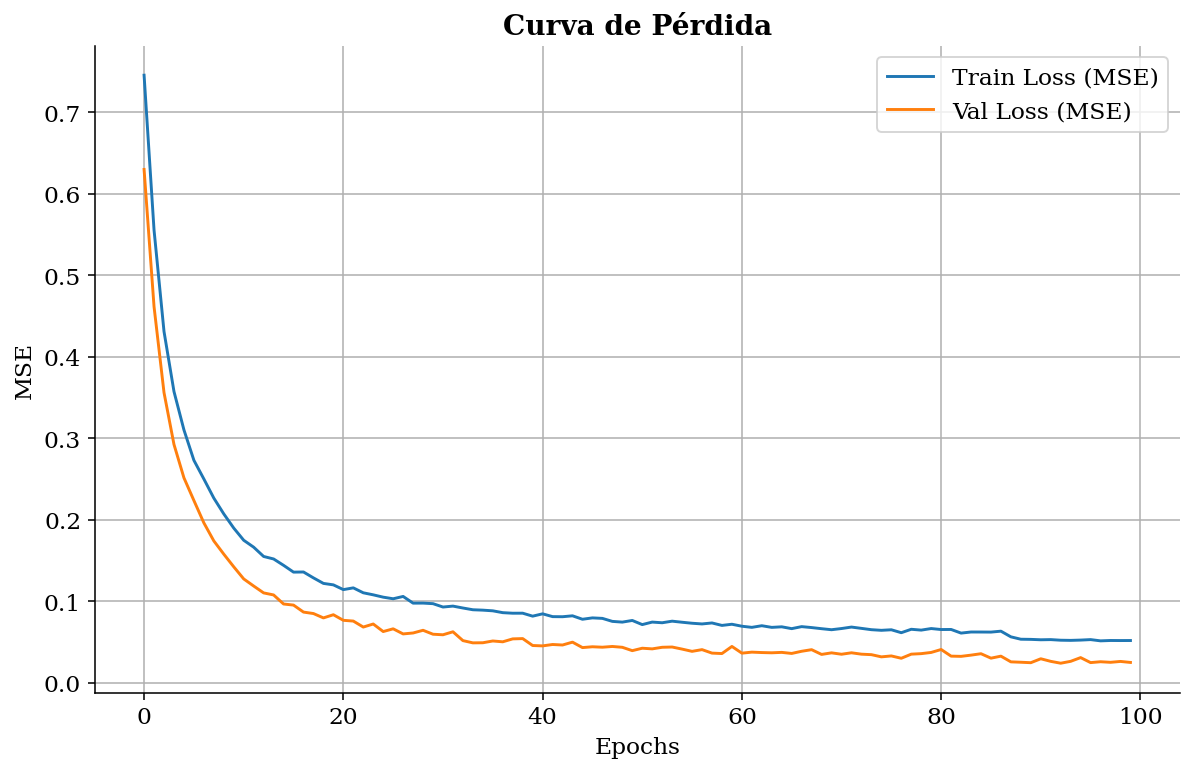

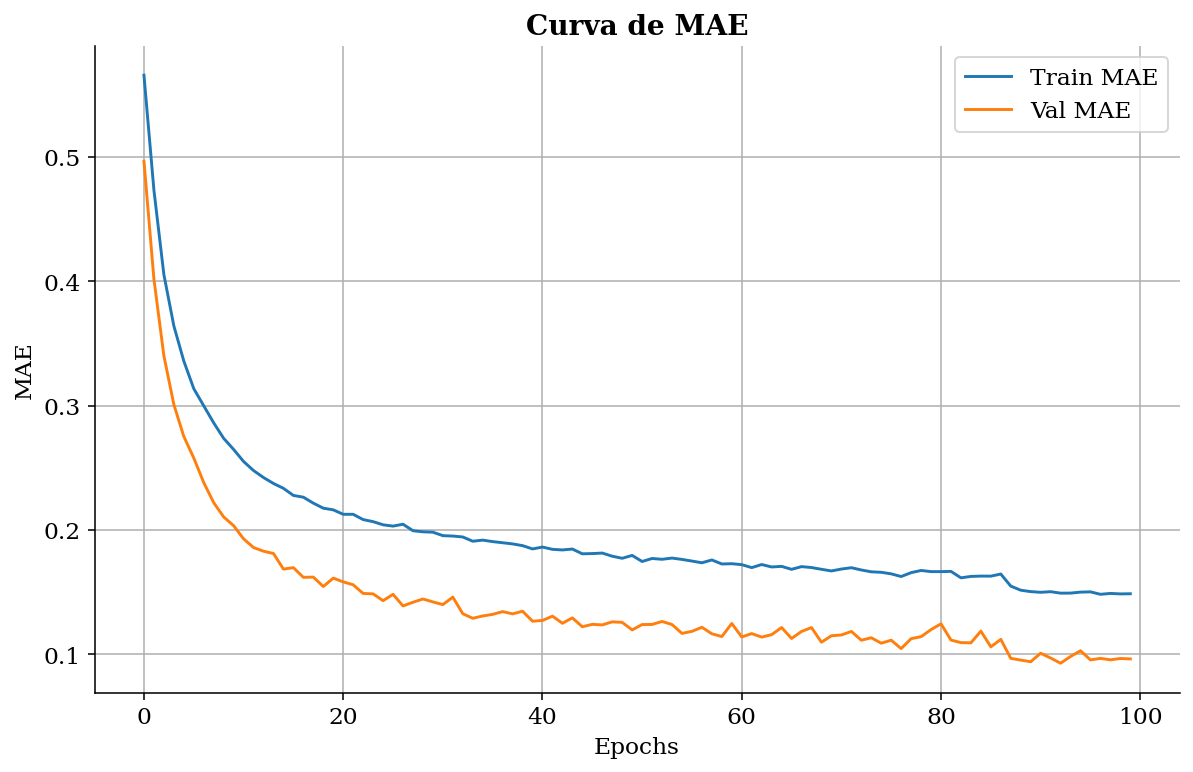

In [ ]:
import matplotlib.pyplot as plt

# --- Curva de Pérdida (MSE) ---
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Val Loss (MSE)')
plt.title("Curva de Pérdida")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.show()

# --- Curva de MAE ---
plt.figure(figsize=(10,6))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title("Curva de MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.grid(True)
plt.show()

FANTANTE

# **Análisis** comparativo de los modelos

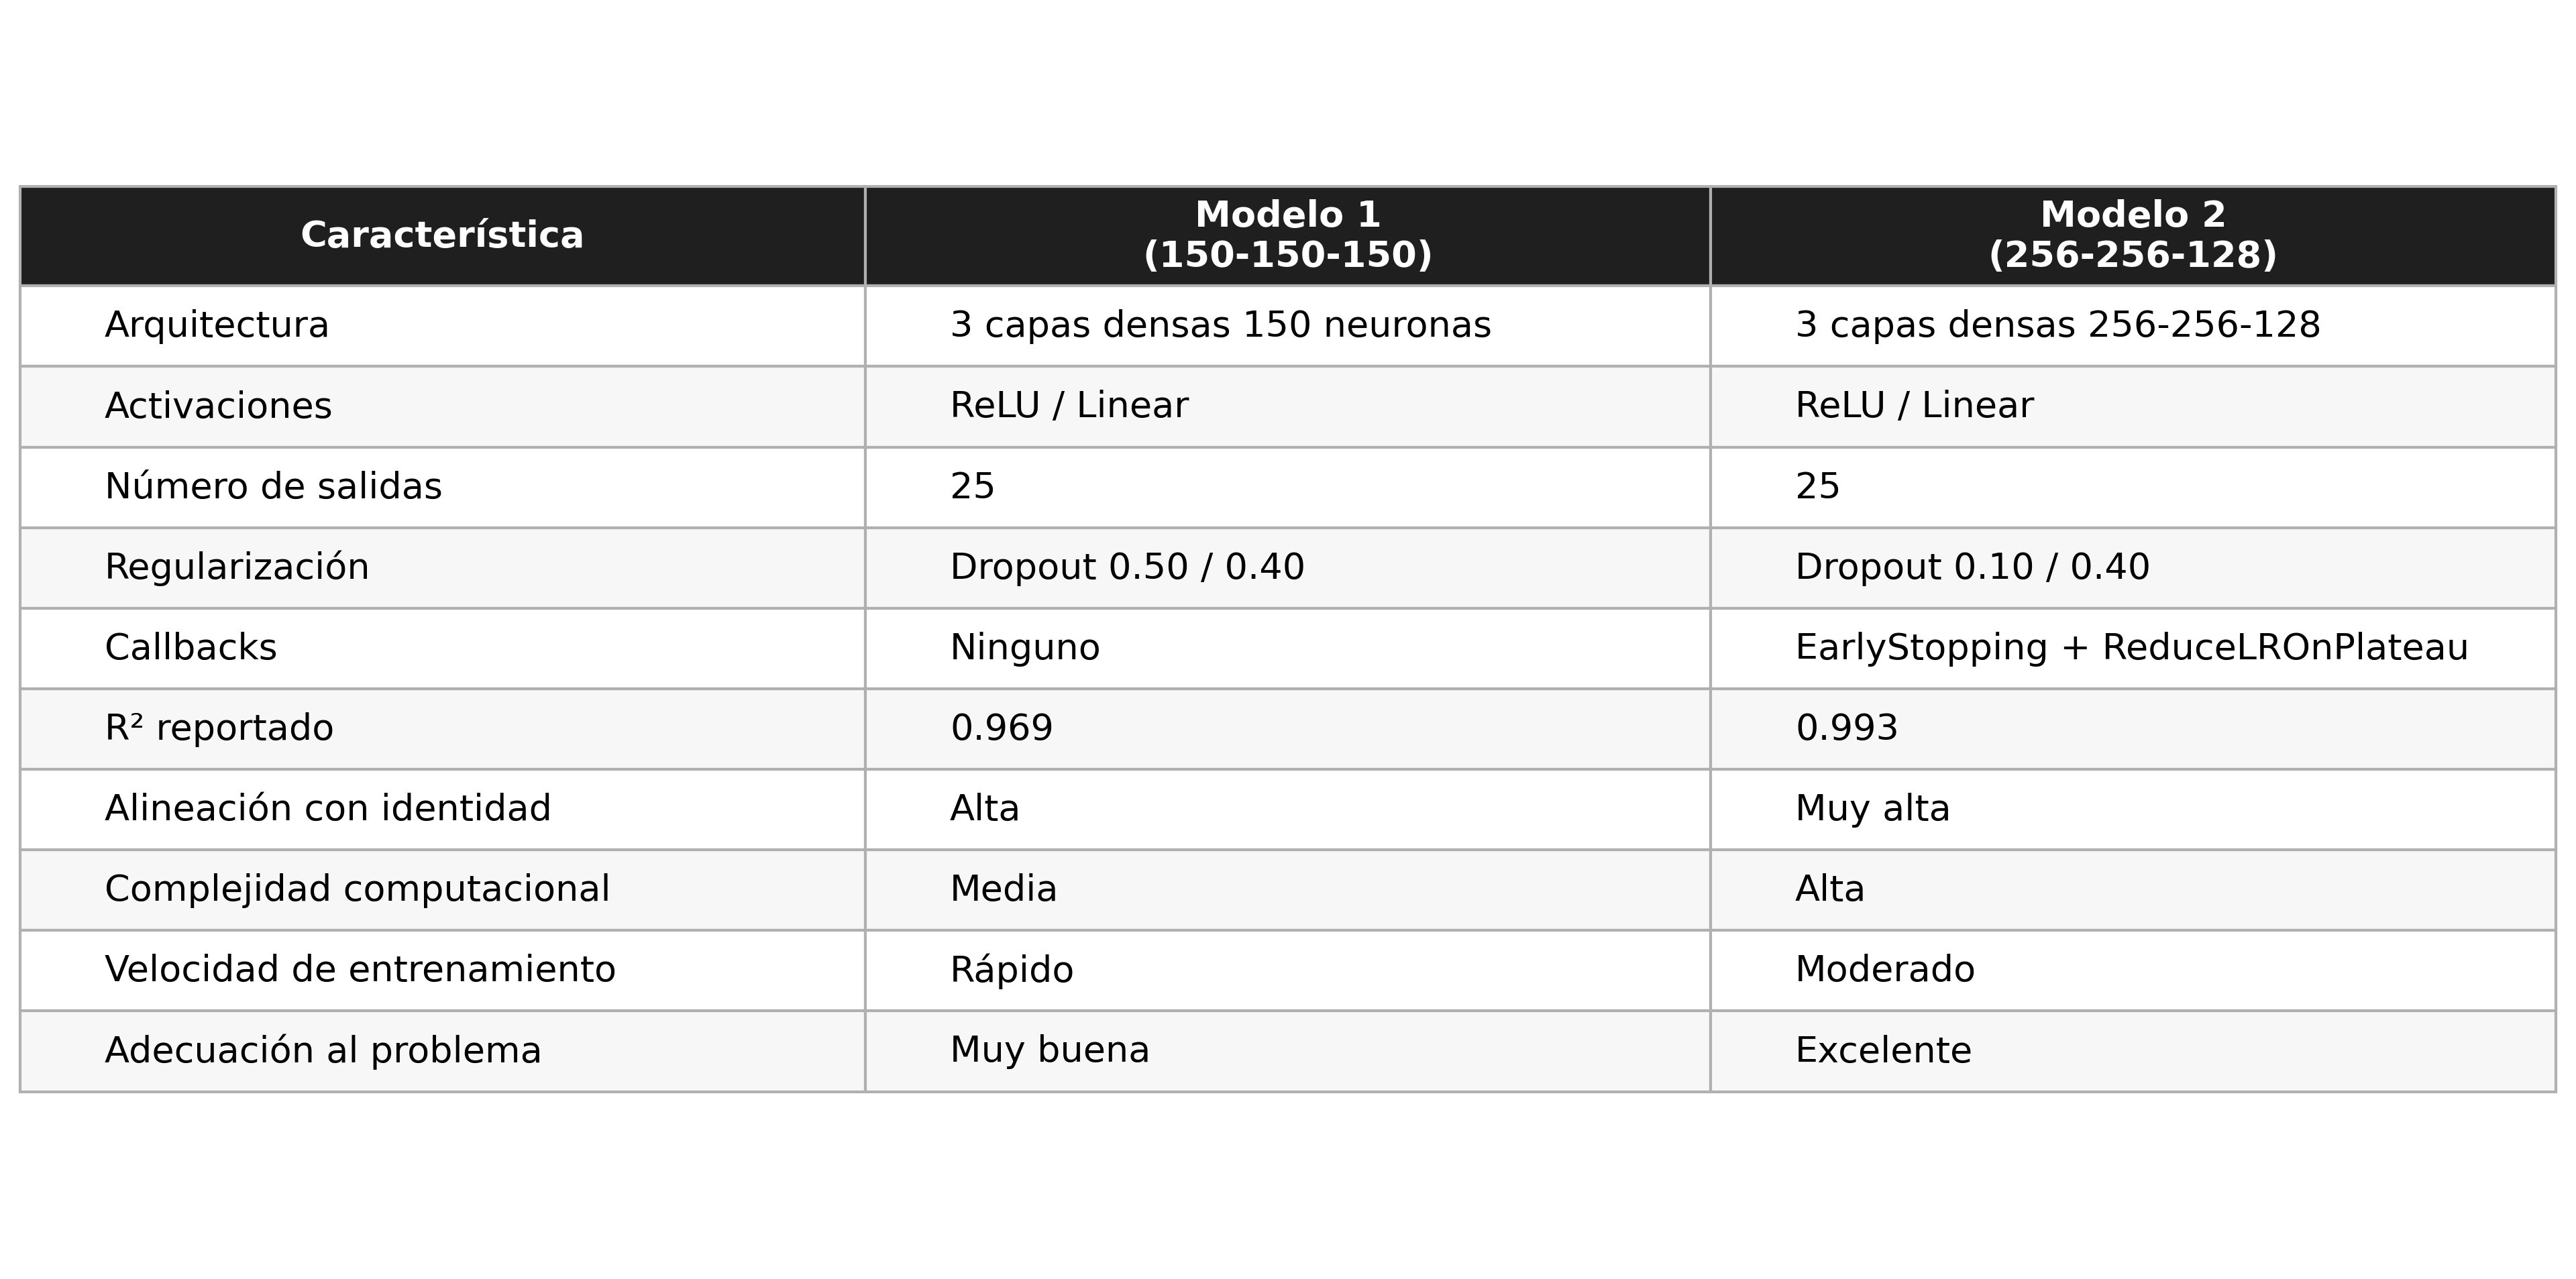

https://drive.google.com/drive/u/0/folders/1ttK9SLVBO663Yi3wNamHfy8T0svqJyEn